# Exercise 1: Regression on Boston housing price

We are going to work on a dataset about prices of houses in Boston. Our goal will be to predict the price of a house, knowing for example its number of rooms or its location. For this you will use the linear regression model that you saw this morning.

This excercise is split into two parts : a first part where you will only use one variable and build your own sickit-learn estimator and a second part where you can use all the variables in the database and the linear regression model implemented in sickit-learn (http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html).

In [19]:
%matplotlib inline
import matplotlib
import matplotlib.pylab as plt
import seaborn as sns # for statistica data visualization
matplotlib.rcParams['savefig.dpi'] = 144
matplotlib.rcParams['figure.figsize'] = (15,10)
matplotlib.rcParams['xtick.labelsize'] = 15
matplotlib.rcParams['ytick.labelsize'] = 15
matplotlib.rcParams['lines.markersize'] = 15

# Scientific Libraries
import numpy as np
import scipy as sp
import sklearn as sk

## Part 1: Simple Linear Regression 

The goal of this first excercise is to build a simple linear model with one variable and visualize its results.
We are going to study the relation between the price of a house and its number of rooms, using a simple linear regression.

The dataset you are going to use can be found here (.../house_prices.tsv).
Information about this dataset (including name and meaning of variables) can be found here (https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.names).

The target variable in our case is therefore "MEDV", the median value of a house. 
As predicting variable you should only use for now "RM", the average number of rooms.

You should implement your solution creating a sickit-learn estimator of the following type : 
``` python
class Estimator(base.BaseEstimator, base.RegressorMixin)
    def __init__(self, ...):
        # initialization code

    def fit(self, X, y):
        # fit the model ...
        return self

    def predict(self, X):
        return # prediction
```

After fitting this estimator with observations of the database, you should use the predict method to plot the ouput of the model.
This plot should be a combination of a scatter plot with all the observations of the dataset and a linear plot using the fitted model. If your model is correct, the linear plot should be "close to" the observations of the dataset.

#### Importing Dataset

In [2]:
from sklearn.datasets import load_boston
bostonhp = np.loadtxt("../Data/house_price.tsv", delimiter=',')

print("Number of entries: {0}".format(bostonhp.shape[0]))
print("Number of variables: {0}".format(bostonhp.shape[1]))


Number of entries: 506
Number of variables: 14


#### Bird's-Eye view on the variables 

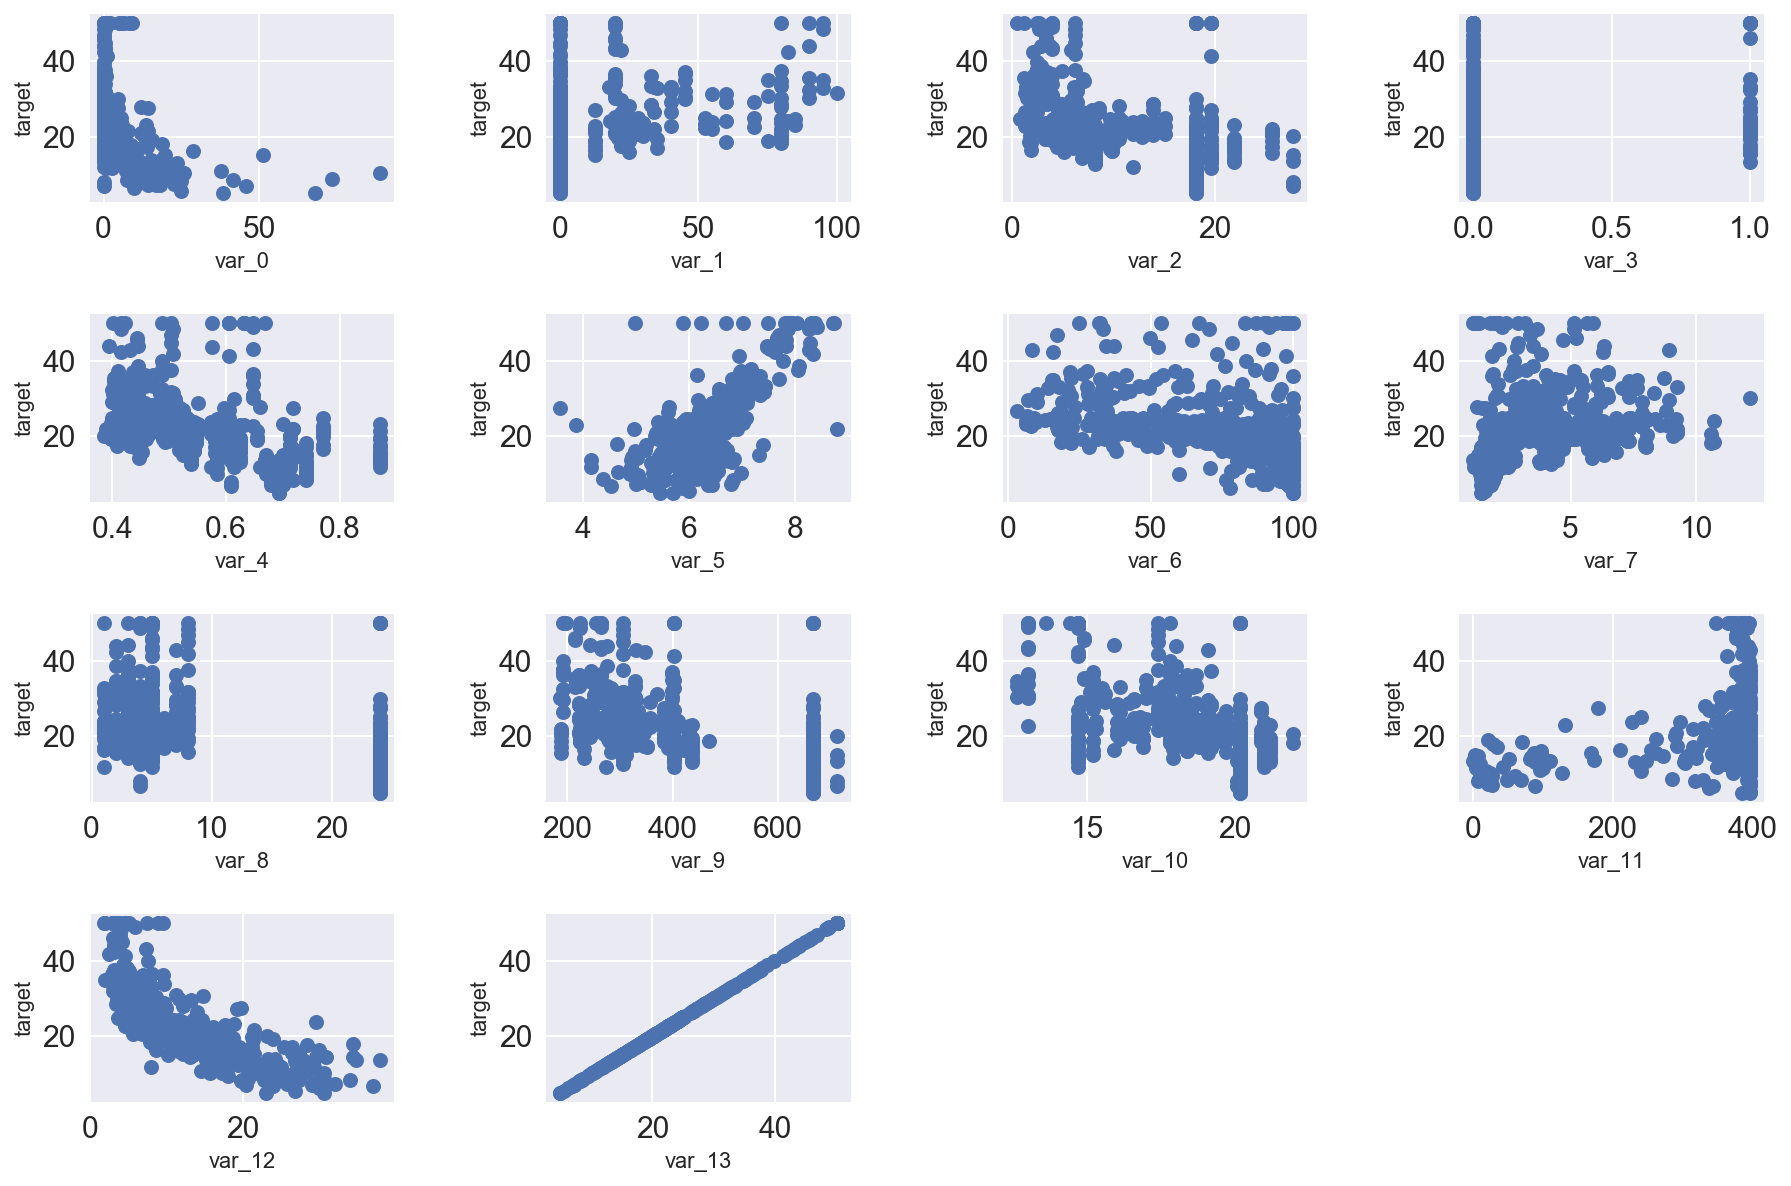

CPU times: user 2.62 s, sys: 38.7 ms, total: 2.66 s
Wall time: 2.67 s


In [3]:
%%time
plt.subplots_adjust(wspace=0.5, hspace=0.6)

target = bostonhp[:,-1] # This is our target, the true price of the house
 
for var_idx in xrange(bostonhp.shape[1]):
    plt.subplot(4,4, var_idx+1)
    plt.plot(bostonhp[:,var_idx], target, '.')
    plt.xlabel('var_{0}'.format(var_idx))
    plt.ylabel('target')
    
plt.show()

Just looking to the variable we can observe that var_5 and var_12 show the best correlation with the target variable. In particular it seems that the inverse of var_12 can perform better w.r.t var_12 itself

#### Let us start our simple linear fit...

As just said var_5 shows a good correlation with the target variable. We will see that its $R^2 = 0.37$.

/Users/Yak52/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


(404,) (404,)
(404, 1) (404,)


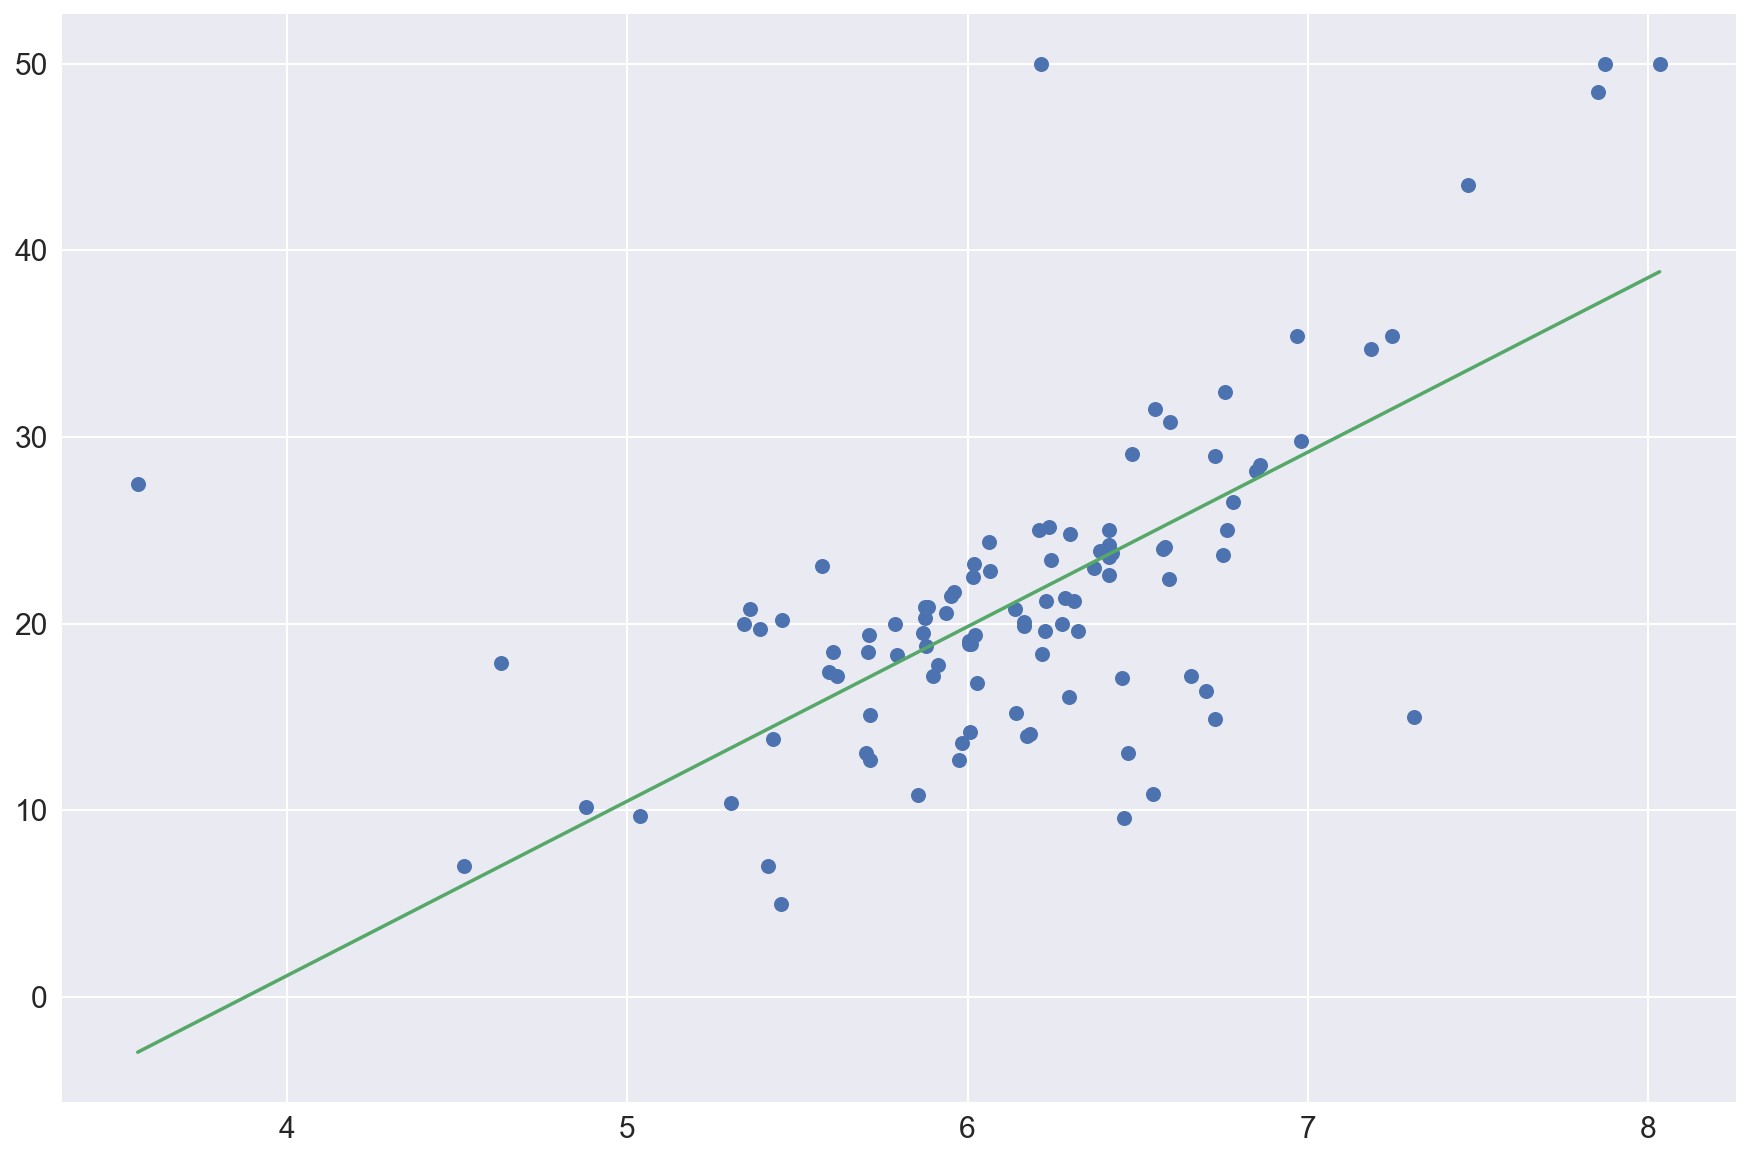

The fitted coefficients are: [ 9.34830141]
The fitted intercept are: -36.2463188981
R^2 = 0.370756923225
CPU times: user 1.18 s, sys: 47 ms, total: 1.23 s
Wall time: 1.08 s


In [4]:
%%time
myvar = 5

from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split

# Splitting the data-set in training and test sample
X_train, X_test, y_train, y_test = train_test_split(bostonhp[:,myvar], target, test_size=0.2, random_state=42)

# the shape here for the x is not properly set.
# By default X is a matrix(n_entries,n_features), when
# working with only 1 variable the n_features is not set.
# This would cause a crash when any methods (i.e. LinearRegression.fit)
# will try to access x.shape[1]
print X_train.shape,y_train.shape

# The trick here is to create a new axis so that
# now the x is a matrix(n_entries,1)
X_train = X_train[:, np.newaxis]
X_test = X_test[:, np.newaxis]
print X_train.shape,y_train.shape


lin_mod = LinearRegression(fit_intercept=True)
lin_mod.fit(X_train,y_train) # fit is a method of the LinearRegression

x_line = np.linspace(min(X_test),max(X_test),300)
y_pred = lin_mod.predict(x_line[:, np.newaxis]) # predict is a method of the LinearRegression

plt.plot(X_test,y_test,'.')
plt.plot(x_line,y_pred,'-')

plt.show()

print("The fitted coefficients are: {0}".format(str(lin_mod.coef_)))
print("The fitted intercept are: {0}".format(str(lin_mod.intercept_)))
print("R^2 = {0}".format(lin_mod.score(X_test,y_test)))

## Simple variable scoring

We will now see that applying a simple transformation to some variables, their correlation with the target (measured with $R^2$) increases.

In [9]:
# Now we introduce in the model also var_2 which as well as var_8 looks
# well correlated to the target 
# Splitting the data-set in training and test sample
#for variabl in range(0,12):


ftransform = lambda x: 1./ (x + 0.001)

for var in range(13):
    # for the variables
    X_train1, X_test1, y_train1, y_test1 = train_test_split(bostonhp[:,[var]], target, test_size=0.2, random_state=42)

    # for the variable trasformed according to ftransform
    X_train2, X_test2, y_train2, y_test2 = train_test_split(ftransform(bostonhp[:,[var]]), target, test_size=0.2, random_state=42)

    lin_mod1 = LinearRegression(fit_intercept=True)
    lin_mod1.fit(X_train1,y_train1)
    
    lin_mod2 = LinearRegression(fit_intercept=True)
    lin_mod2.fit(X_train2,y_train2)

    #print("The fitted coefficients are: {0}".format(str(lin_mod.coef_)))
    #print("The fitted intercept are: {0}".format(str(lin_mod.intercept_)))
    print(var,"R^2 = {0}".format(lin_mod1.score(X_test1,y_test1)), " transf: R^2 = {0}".format(lin_mod2.score(X_test2,y_test2)))
    #print(var,"R^2 = {0}".format(lin_mod1.score(X_test1,y_test1)))

    
# Now R^2 increases with respect to the case where we use only var_8.
# From the analysis of the coefficients we can see how var_2 seems to be
# the most correlated variable to the target, followed by var_8, while 
# var_0 as before, is still very weekly correlated to the target

(0, 'R^2 = 0.158604430872', ' transf: R^2 = 0.173310760367')
(1, 'R^2 = 0.258902902851', ' transf: R^2 = 0.206020253303')
(2, 'R^2 = 0.276407922082', ' transf: R^2 = 0.232417532387')
(3, 'R^2 = -0.019099275022', ' transf: R^2 = -0.019099275022')
(4, 'R^2 = 0.205204976198', ' transf: R^2 = 0.218539759011')
(5, 'R^2 = 0.370756923225', ' transf: R^2 = 0.163243808148')
(6, 'R^2 = 0.240014912379', ' transf: R^2 = 0.0321632414375')
(7, 'R^2 = 0.0733204206924', ' transf: R^2 = 0.103544951679')
(8, 'R^2 = 0.104754457202', ' transf: R^2 = 0.0247606313514')
(9, 'R^2 = 0.241304246596', ' transf: R^2 = 0.287462492505')
(10, 'R^2 = 0.318508118208', ' transf: R^2 = 0.315454847815')
(11, 'R^2 = 0.068404640638', ' transf: R^2 = -0.0216231305728')
(12, 'R^2 = 0.542918042297', ' transf: R^2 = 0.676239933087')


From this simple analysis we can observe that some varible (take in particular var_12) are better correlated after the inverse transformation that we applied on it.

## Let us build our own Estimator

Suppose we are not satisfied by the sklearn implementation. We can now implement our own estimator, where the fit method is a simple linear regression (https://en.wikipedia.org/wiki/Simple_linear_regression)

In [15]:

class MyEstimator(sk.base.BaseEstimator, sk.base.RegressorMixin):
    # It iherit from: sk.base.BaseEstimator, sk.base.RegressorMixin
    def __init__(self):
        self.alpha = np.nan
        self.beta = np.nan

    def fit(self, X, y):
        self.beta = np.cov(X, y)[0,1] / np.var(X)
        self.alpha = y.mean(axis = 0) - self.beta * X.mean(axis = 0)
        return self

    def predict(self, X):
        return self.alpha + self.beta * X

alpha = -34.783895, beta = 9.120133


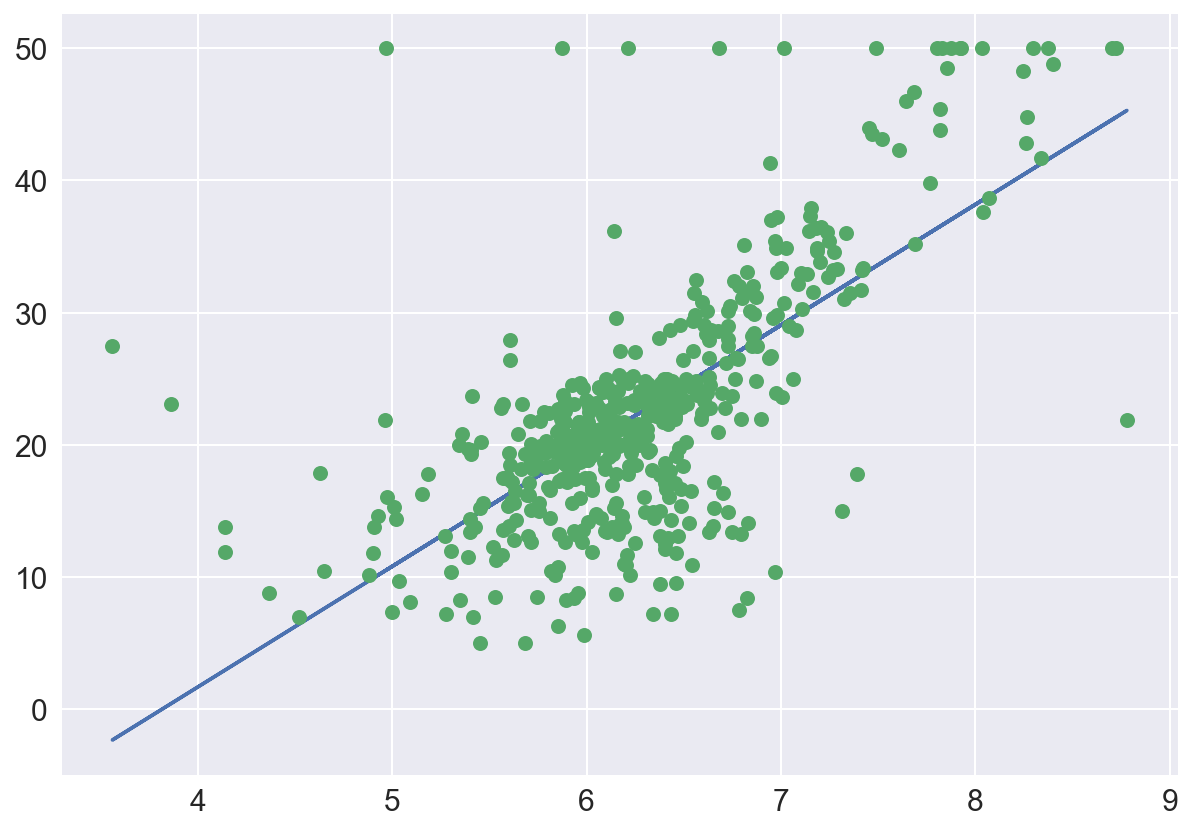

In [20]:
my_model = MyEstimator()

my_X = bostonhp[:,5]

my_model.fit(my_X, target)
my_prediction = my_model.predict(my_X)

plt.plot(my_X, my_prediction, '-')
plt.plot(my_X, target, '.')

print "alpha = %f, beta = %f" %(my_model.alpha, my_model.beta)
plt.show()

alpha = -36.392827, beta = 9.371498


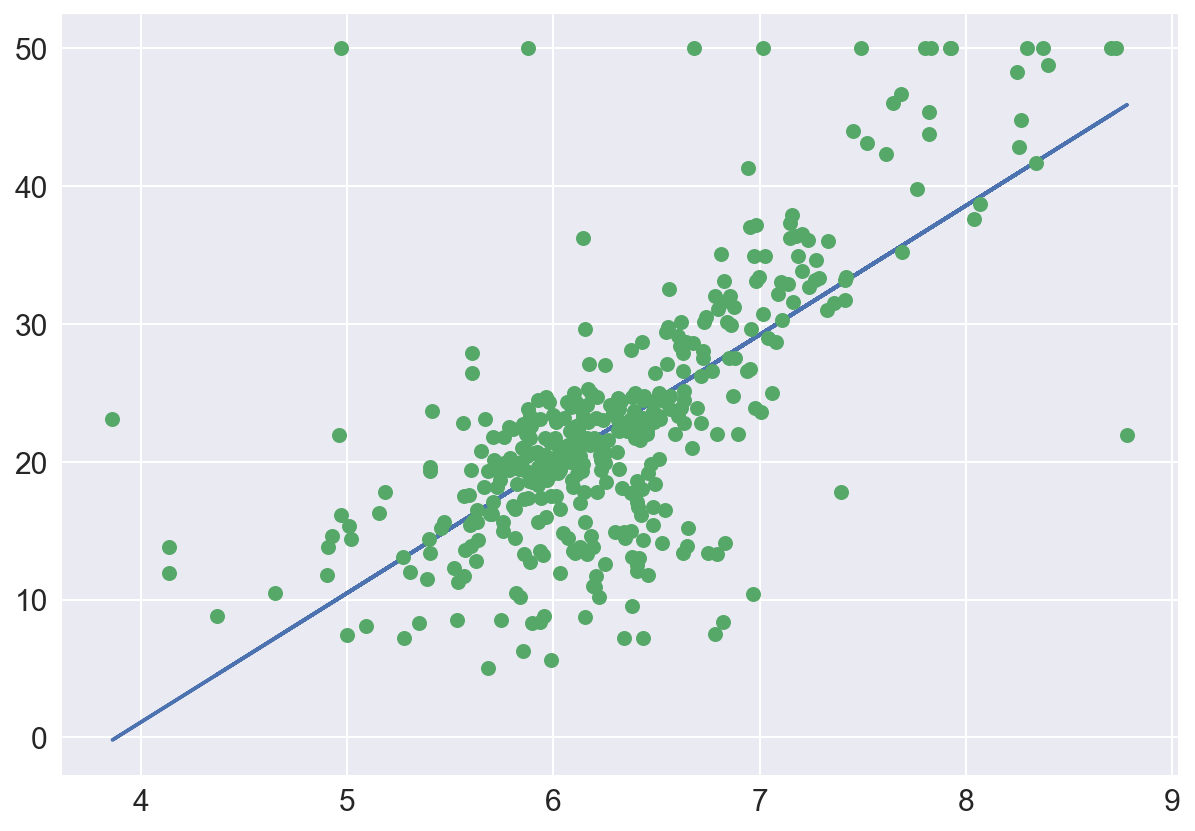

In [21]:
my_model = Estimator()

my_model.fit(X_train[:,0],y_train)
my_prediction = my_model.predict(X_train[:,0])

plt.plot(X_train[:,0], my_prediction, '-')
plt.plot(X_train[:,0], y_train, '.')

print "alpha = %f, beta = %f" %(my_model.alpha, my_model.beta)
plt.show()

## Part 2: Multiple Linear Regression 

We are going to use multiple variables and insert them in variable_list. If we transform and select them properly the $R^2$ coefficient is going to increase. 

In [27]:
from sklearn.linear_model import LinearRegression


ftransform = lambda x: 1./ (x + 0.001)

variable_list = [bostonhp[:,5], bostonhp[:,12], ftransform(bostonhp[:,12]), bostonhp[:,10]]

multi_variable = np.zeros((bostonhp.shape[0], len(variable_list)))

for i in range(len(variable_list)):
    multi_variable[:,i] = variable_list[i] 
        
    multi_lin_mod = LinearRegression(fit_intercept=True)
    multi_lin_mod.fit(multi_variable, target)

    print "num_var %d, my score %f" %(0 + i ,multi_lin_mod.score(multi_variable, target))
    

num_var 0, my score 0.483525
num_var 1, my score 0.638562
num_var 2, my score 0.710845
num_var 3, my score 0.738297


### Split Training and Test + Multivarible Regression: Selected Variables

In this first multiple varible regression we select 4 variable which are considered the most correlated with our target

In [42]:
ftransform = lambda x: 1./ (x + 0.001)

variable_list = [bostonhp[:,5], bostonhp[:,12], ftransform(bostonhp[:,12]), bostonhp[:,10]]

multi_variable = np.zeros((bostonhp.shape[0], len(variable_list)))

for i in range(len(variable_list)):
    multi_variable[:,i] = variable_list[i] 
    
    X_train, X_test, y_train, y_test = train_test_split(multi_variable, target, test_size=0.2, random_state=42)
        
    multi_lin_mod = LinearRegression(fit_intercept=True)
    multi_lin_mod.fit(X_train, y_train)

    print "num_var %d, my score %f" %(0 + i ,multi_lin_mod.score(X_test, y_test))
    

num_var 0, my score 0.370757
num_var 1, my score 0.573958
num_var 2, my score 0.685870
num_var 3, my score 0.712286


#### K-fold Cross Validation

In [43]:
from sklearn.model_selection import cross_val_score

variable_list = [bostonhp[:,5], bostonhp[:,12], ftransform(bostonhp[:,12]), bostonhp[:,10]]

multi_variable = np.zeros((bostonhp.shape[0], len(variable_list)))

for i in range(len(variable_list)):
    multi_variable[:,i] = variable_list[i] 
    
X_train, X_test, y_train, y_test = train_test_split(multi_variable, target, test_size=0.2, random_state=42)
        
multi_lin_mod = LinearRegression(fit_intercept=True)
multi_lin_mod.fit(X_train, y_train)

scores = cross_val_score(multi_lin_mod, X_test, y_test, cv=2, scoring="r2")

print "K-fold Score Mean: ", scores.mean()

Score Mean:  0.706130647812


### Split Training and Test + Multivarible Regression: All variables

In this second multiple varible regression we are going to consider all the variables.

In [44]:
from sklearn.model_selection import cross_val_score

#variable_list = [bostonhp[:,5], bostonhp[:,12], ftransform(bostonhp[:,12]), bostonhp[:,10]]

multi_variable = np.zeros((bostonhp.shape[0], 13))

for i in range(len(variable_list)):
    multi_variable[:,i] = bostonhp[:,i] 
    
X_train, X_test, y_train, y_test = train_test_split(multi_variable, target, test_size=0.2, random_state=42)
        
multi_lin_mod = LinearRegression(fit_intercept=True)
multi_lin_mod.fit(X_train, y_train)

scores = cross_val_score(multi_lin_mod, X_test, y_test, cv=2, scoring="r2")

print "K-fold Score Mean: ", scores.mean()

K-fold Score Mean:  0.273220090384
